# Analyse Exploratoire du fichier myreport_cpu_full.csv

### Imports (fichier & modules)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [43]:
# pour connaitre le repertoire dans lequelle on est
!pwd

/Users/guillaumeramirez/Git/smartETL/notebook


In [44]:
tab = pd.read_csv('../data/logServer/myreport_cpu_full.csv',sep=',')

### Le fichier myreport_cpu_full.csv : taille, colonnes

In [45]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  24  colonnes dans le data frame


In [46]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)', 'Somme', 'Somme(RAW)',
       'Processeur 1', 'Processeur 1(RAW)', 'Processeur 2',
       'Processeur 2(RAW)', 'Processeur 3', 'Processeur 3(RAW)',
       'Processeur 4', 'Processeur 4(RAW)', 'Processeur 5',
       'Processeur 5(RAW)', 'Processeur 6', 'Processeur 6(RAW)',
       'Processeur 7', 'Processeur 7(RAW)', 'Processeur 8',
       'Processeur 8(RAW)', 'Temps mort', 'Temps mort(RAW)', 'Couverture',
       'Couverture(RAW)'],
      dtype='object')

In [47]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date et heure       2882 non-null   object 
 1   Date et heure(RAW)  2881 non-null   float64
 2   Somme               2195 non-null   object 
 3   Somme(RAW)          2194 non-null   float64
 4   Processeur 1        1237 non-null   object 
 5   Processeur 1(RAW)   2194 non-null   float64
 6   Processeur 2        1459 non-null   object 
 7   Processeur 2(RAW)   2194 non-null   float64
 8   Processeur 3        1786 non-null   object 
 9   Processeur 3(RAW)   2194 non-null   float64
 10  Processeur 4        1700 non-null   object 
 11  Processeur 4(RAW)   2194 non-null   float64
 12  Processeur 5        1451 non-null   object 
 13  Processeur 5(RAW)   2194 non-null   float64
 14  Processeur 6        1459 non-null   object 
 15  Processeur 6(RAW)   2194 non-null   float64
 16  Proces

In [48]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date et heure       2882 non-null   object 
 1   Date et heure(RAW)  2881 non-null   float64
 2   Somme               2195 non-null   object 
 3   Somme(RAW)          2194 non-null   float64
 4   Processeur 1        1237 non-null   object 
 5   Processeur 1(RAW)   2194 non-null   float64
 6   Processeur 2        1459 non-null   object 
 7   Processeur 2(RAW)   2194 non-null   float64
 8   Processeur 3        1786 non-null   object 
 9   Processeur 3(RAW)   2194 non-null   float64
 10  Processeur 4        1700 non-null   object 
 11  Processeur 4(RAW)   2194 non-null   float64
 12  Processeur 5        1451 non-null   object 
 13  Processeur 5(RAW)   2194 non-null   float64
 14  Processeur 6        1459 non-null   object 
 15  Processeur 6(RAW)   2194 non-null   float64
 16  Proces

In [49]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure         2882
Date et heure(RAW)    2881
Somme                  456
Somme(RAW)            1062
Processeur 1            31
Processeur 1(RAW)      822
Processeur 2            62
Processeur 2(RAW)     1086
Processeur 3            73
Processeur 3(RAW)     1226
Processeur 4            60
Processeur 4(RAW)     1124
Processeur 5            63
Processeur 5(RAW)     1066
Processeur 6            64
Processeur 6(RAW)     1034
Processeur 7            62
Processeur 7(RAW)     1121
Processeur 8            55
Processeur 8(RAW)      993
Temps mort              13
Temps mort(RAW)         25
Couverture              13
Couverture(RAW)         12
dtype: int64


In [50]:
tab.head()


,Date et heure,Date et heure(RAW),Somme,Somme(RAW),Processeur 1,Processeur 1(RAW),Processeur 2,Processeur 2(RAW),Processeur 3,Processeur 3(RAW),...,Processeur 6,Processeur 6(RAW),Processeur 7,Processeur 7(RAW),Processeur 8,Processeur 8(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,12 %,11.5833,6 %,5.7500,7 %,7.3333,26 %,26.5000,...,7 %,7.0000,18 %,18.0000,12 %,11.5000,0 %,0.0,40 %,4000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,"0,08 %",0.0833,NaN,0.0833,NaN,0.0833,NaN,0.0833,...,NaN,0.1667,NaN,0.0833,NaN,0.0833,0 %,0.0,40 %,4000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,"0,08 %",0.0833,NaN,0.0833,NaN,0.0833,NaN,0.1667,...,NaN,0.0833,NaN,0.1667,NaN,0.0833,0 %,0.0,40 %,4000.0


In [51]:
tab["Date et heure"] = tab["Date et heure"].str.split(" - ").str[0]

In [52]:
tab = tab.iloc[:-5]
tab['Date et heure'] = pd.to_datetime(tab['Date et heure'], format="%d/%m/%Y %H:%M:%S")

In [53]:
tab.head()

,Date et heure,Date et heure(RAW),Somme,Somme(RAW),Processeur 1,Processeur 1(RAW),Processeur 2,Processeur 2(RAW),Processeur 3,Processeur 3(RAW),...,Processeur 6,Processeur 6(RAW),Processeur 7,Processeur 7(RAW),Processeur 8,Processeur 8(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,2024-08-13 00:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,2024-08-13 01:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,2024-08-13 02:00:00,45517.041667,12 %,11.5833,6 %,5.7500,7 %,7.3333,26 %,26.5000,...,7 %,7.0000,18 %,18.0000,12 %,11.5000,0 %,0.0,40 %,4000.0
3,2024-08-13 03:00:00,45517.083333,"0,08 %",0.0833,NaN,0.0833,NaN,0.0833,NaN,0.0833,...,NaN,0.1667,NaN,0.0833,NaN,0.0833,0 %,0.0,40 %,4000.0
4,2024-08-13 04:00:00,45517.125000,"0,08 %",0.0833,NaN,0.0833,NaN,0.0833,NaN,0.1667,...,NaN,0.0833,NaN,0.1667,NaN,0.0833,0 %,0.0,40 %,4000.0


In [54]:
start_date = '2024-08-24 23:32:03'
end_date = '2024-10-15 23:31:49'

tab = tab[(tab['Date et heure'] >= start_date) & (tab['Date et heure'] <= end_date)]

In [55]:
tab.head()

,Date et heure,Date et heure(RAW),Somme,Somme(RAW),Processeur 1,Processeur 1(RAW),Processeur 2,Processeur 2(RAW),Processeur 3,Processeur 3(RAW),...,Processeur 6,Processeur 6(RAW),Processeur 7,Processeur 7(RAW),Processeur 8,Processeur 8(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
288,2024-08-25 00:00:00,45528.958333,24 %,24.1667,11 %,10.6667,17 %,17.3333,31 %,30.5833,...,13 %,13.1667,33 %,32.9167,14 %,14.1667,0 %,0.0,40 %,4000.0
289,2024-08-25 01:00:00,45529.000000,17 %,17.2500,2 %,2.5000,9 %,8.5833,46 %,45.5000,...,2 %,2.5000,45 %,44.5833,8 %,8.2500,0 %,0.0,40 %,4000.0
290,2024-08-25 02:00:00,45529.041667,22 %,21.7500,12 %,12.0000,13 %,13.1667,66 %,65.5833,...,15 %,15.1667,24 %,23.8333,16 %,16.0000,0 %,0.0,40 %,4000.0
291,2024-08-25 03:00:00,45529.083333,"0,08 %",0.0833,NaN,0.0833,NaN,0.0833,NaN,0.0833,...,NaN,0.1667,NaN,0.0833,NaN,0.3333,0 %,0.0,40 %,4000.0
292,2024-08-25 04:00:00,45529.125000,"0,25 %",0.2500,NaN,0.0833,NaN,0.1667,NaN,0.6667,...,NaN,0.1667,NaN,0.4167,NaN,0.4167,0 %,0.0,40 %,4000.0


### Réagencement et Suppression des colonnes

In [56]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure(RAW)"])
tab = tab.drop(columns=["Somme"])
tab = tab.drop(columns=["Processeur 1"])
tab = tab.drop(columns=["Processeur 2"])
tab = tab.drop(columns=["Processeur 3"])
tab = tab.drop(columns=["Processeur 4"])
tab = tab.drop(columns=["Processeur 5"])
tab = tab.drop(columns=["Processeur 6"])
tab = tab.drop(columns=["Processeur 7"])
tab = tab.drop(columns=["Processeur 8"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Couverture"])

# renommage des colonnes
tab.rename(columns={"Somme(RAW)": "Somme(%)"}, inplace=True)
tab.rename(columns={"Processeur 1(RAW)": "Processeur 1(%)"}, inplace=True)
tab.rename(columns={"Processeur 2(RAW)": "Processeur 2(%)"}, inplace=True)
tab.rename(columns={"Processeur 3(RAW)": "Processeur 3(%)"}, inplace=True)
tab.rename(columns={"Processeur 4(RAW)": "Processeur 4(%)"}, inplace=True)
tab.rename(columns={"Processeur 5(RAW)": "Processeur 5(%)"}, inplace=True)
tab.rename(columns={"Processeur 6(RAW)": "Processeur 6(%)"}, inplace=True)
tab.rename(columns={"Processeur 7(RAW)": "Processeur 7(%)"}, inplace=True)
tab.rename(columns={"Processeur 8(RAW)": "Processeur 8(%)"}, inplace=True)

tab.rename(columns={"Temps mort(RAW)": "Temps mort cpu(%)"}, inplace=True)
tab.rename(columns={"Couverture(RAW)": "Couverture cpu(%)"}, inplace=True)


## Analyse temporelle

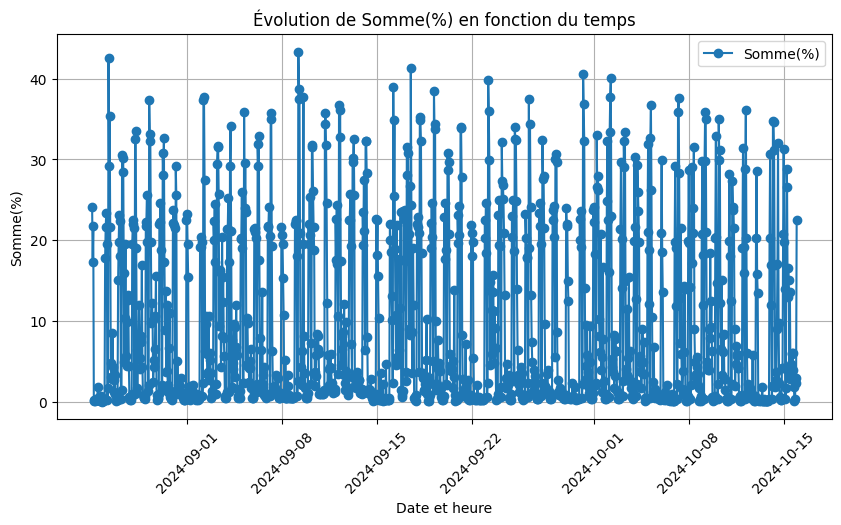

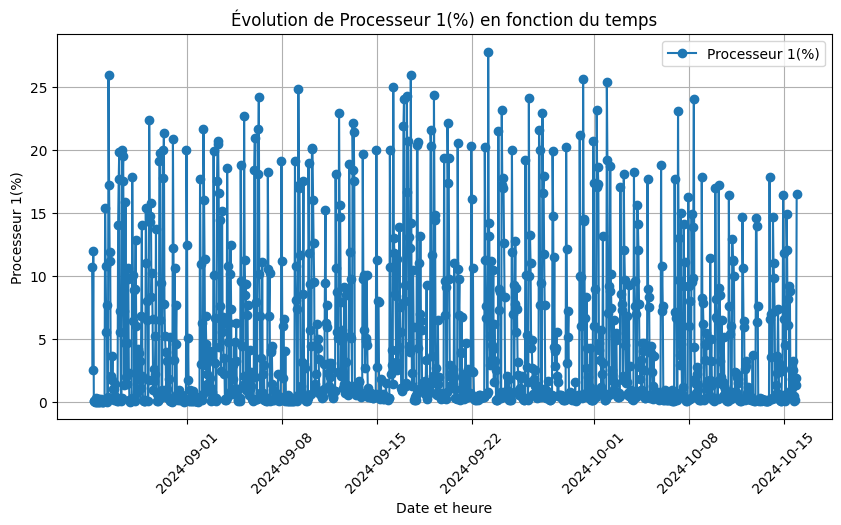

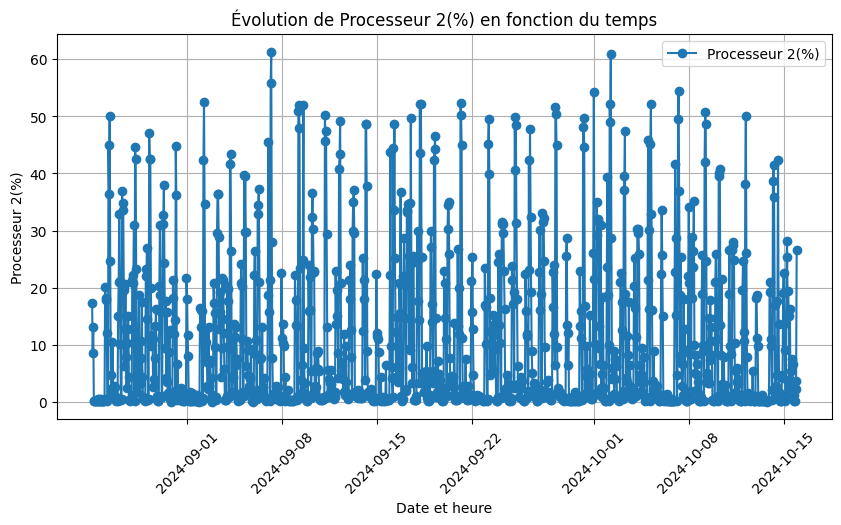

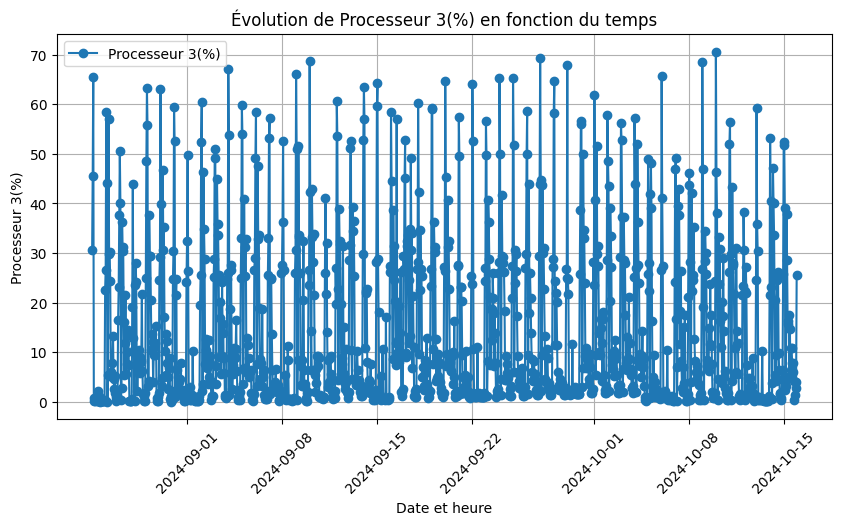

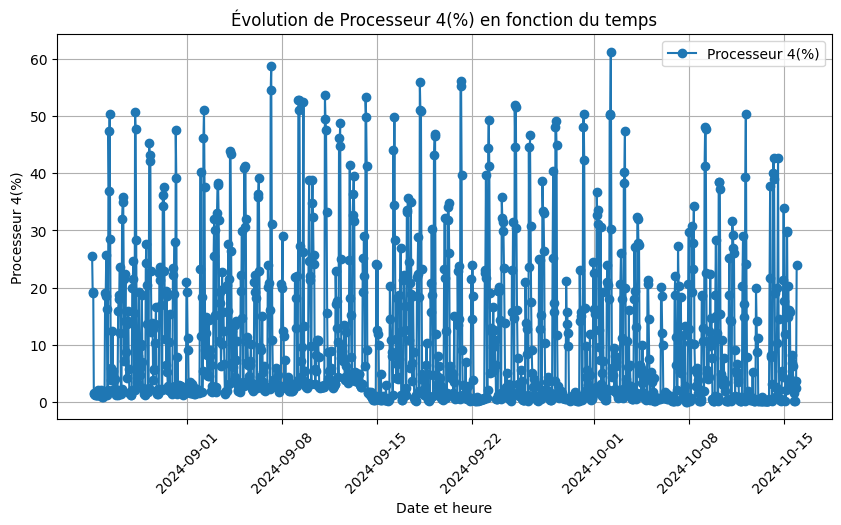

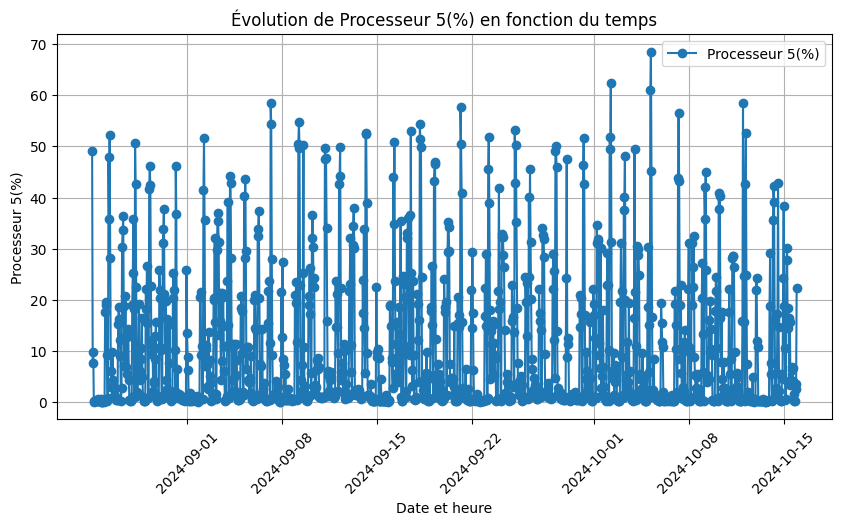

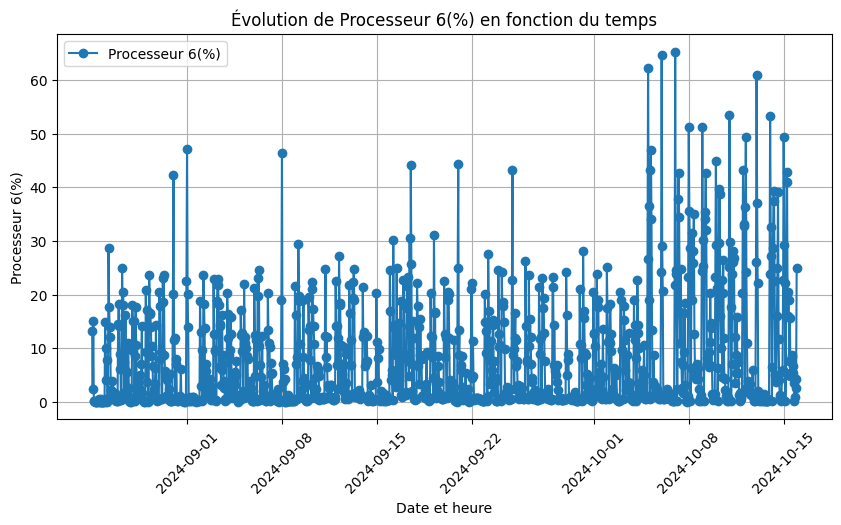

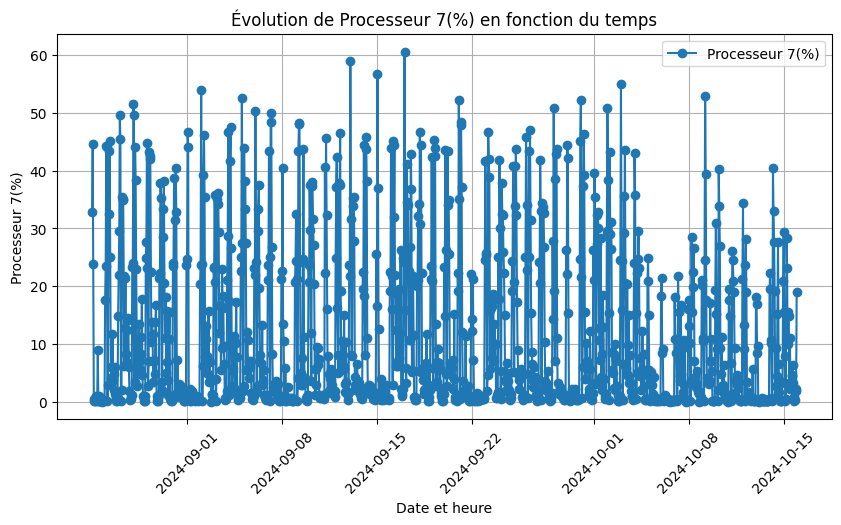

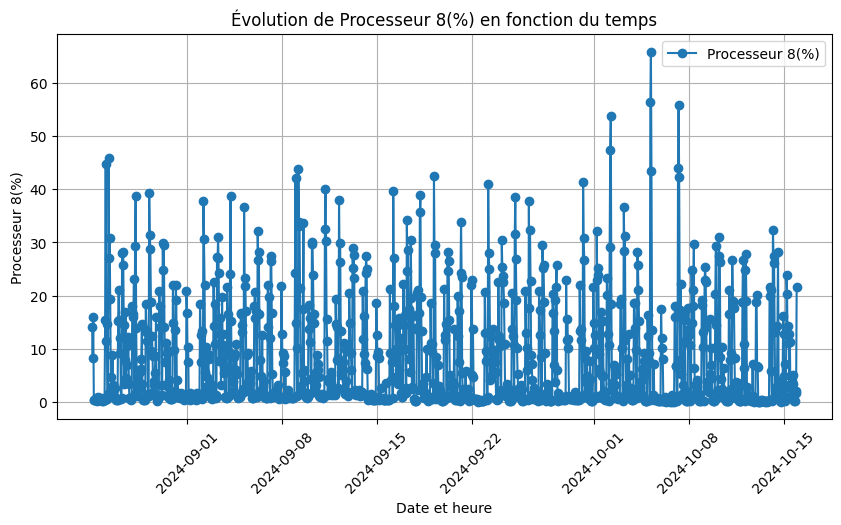

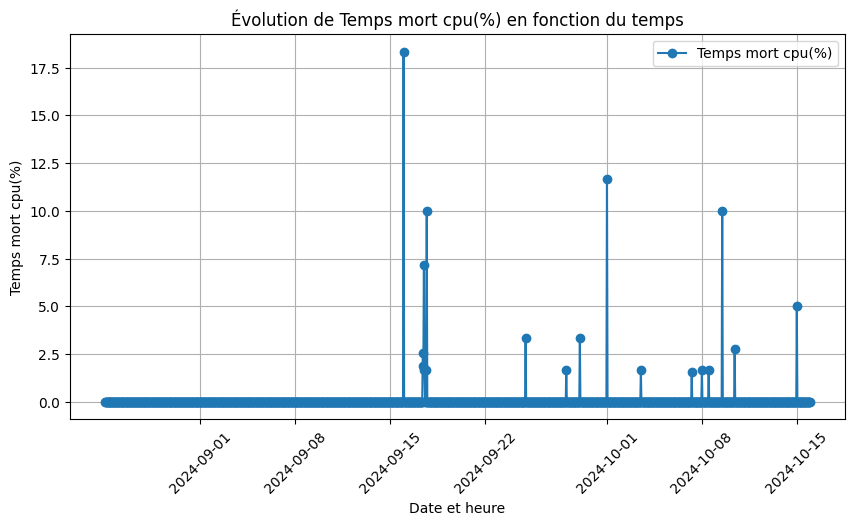

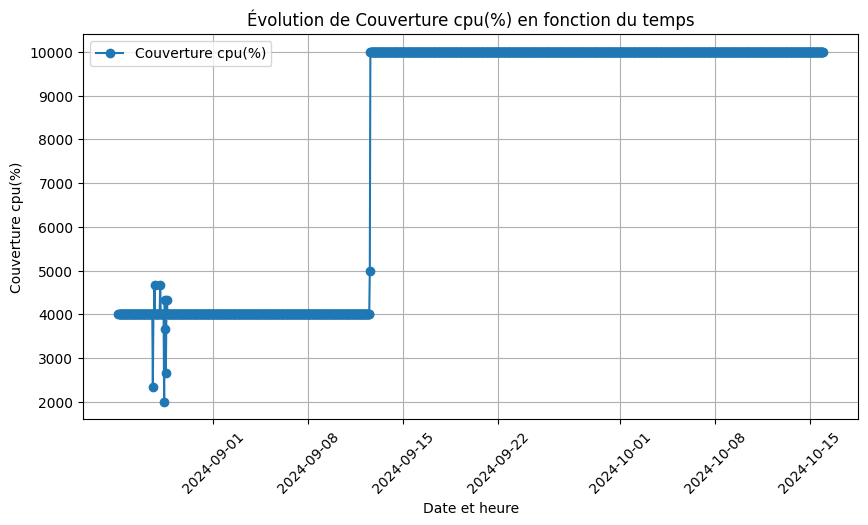

In [57]:
# Vérifier que 'Date et heure' est bien au format datetime
tab["Date et heure"] = pd.to_datetime(tab["Date et heure"])

# Liste des colonnes à exclure
excluded_cols = ["Date et heure"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["Date et heure"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

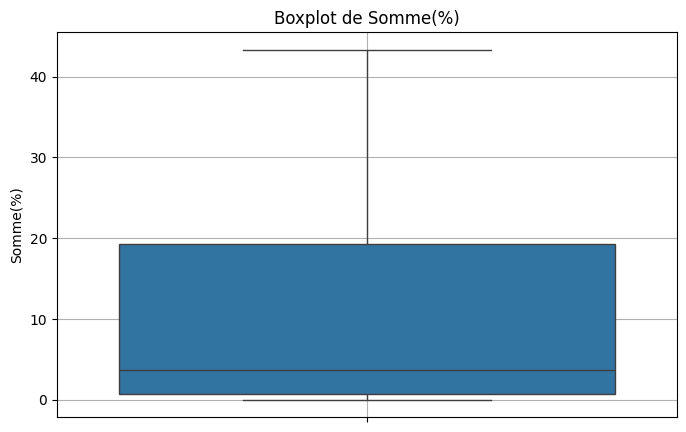

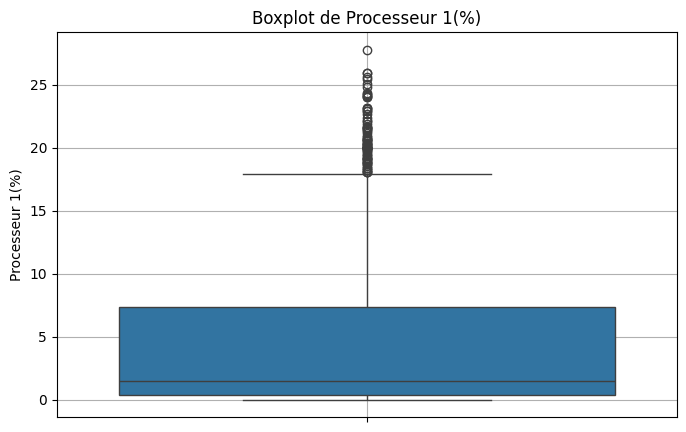

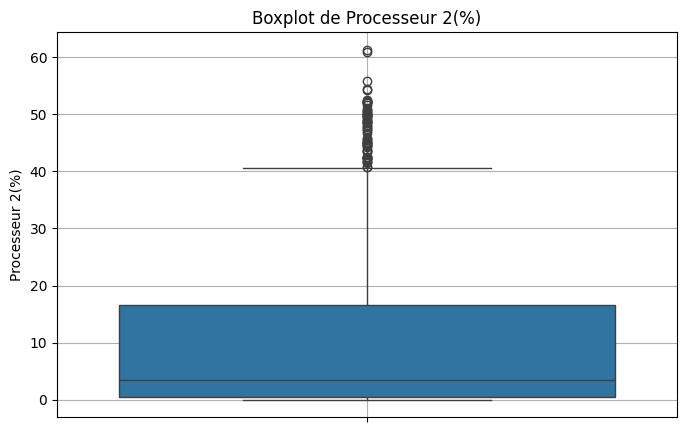

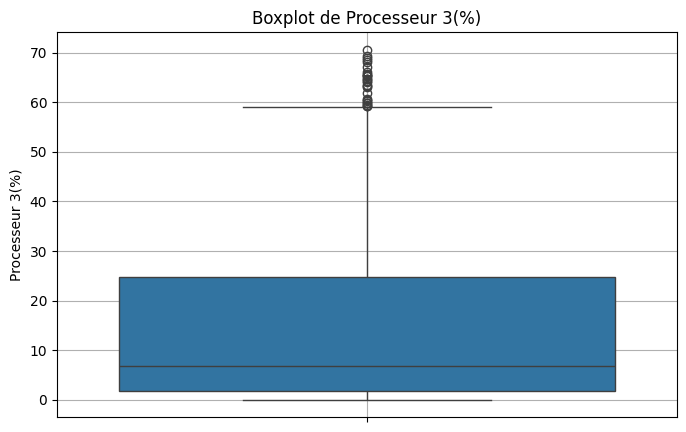

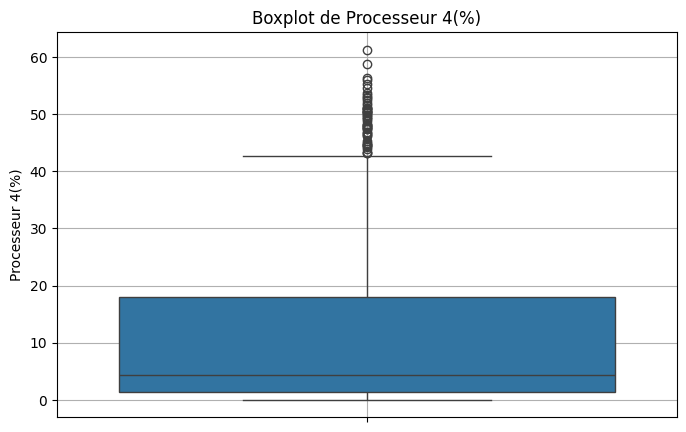

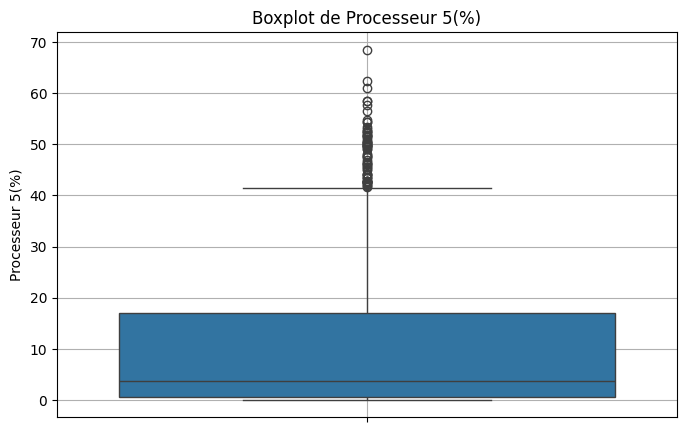

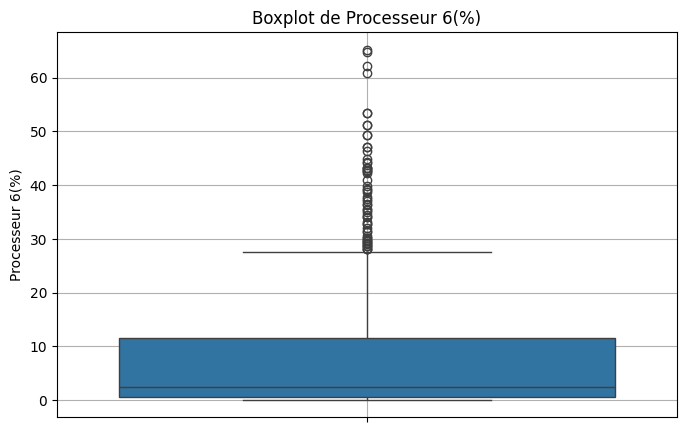

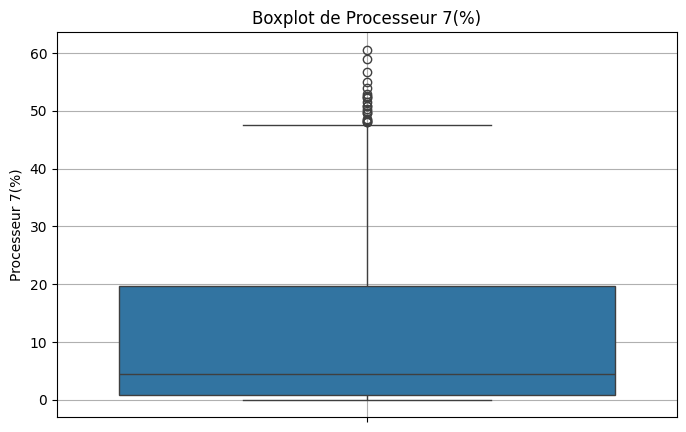

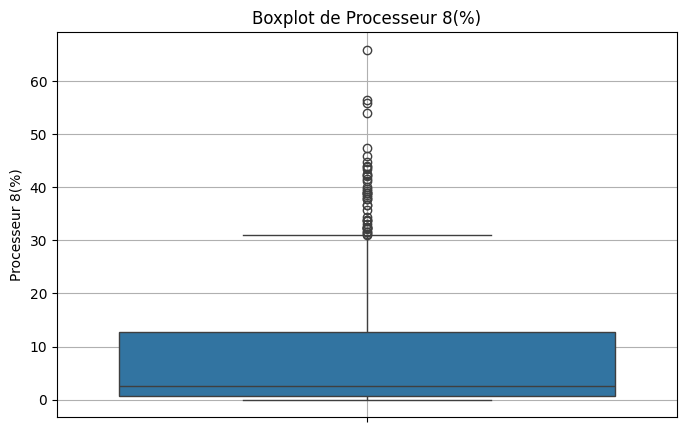

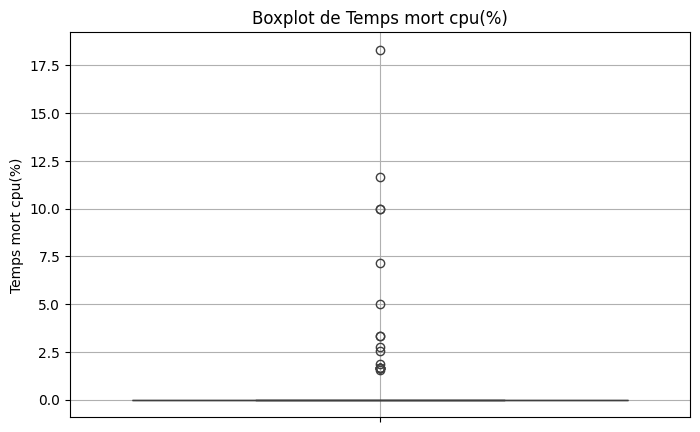

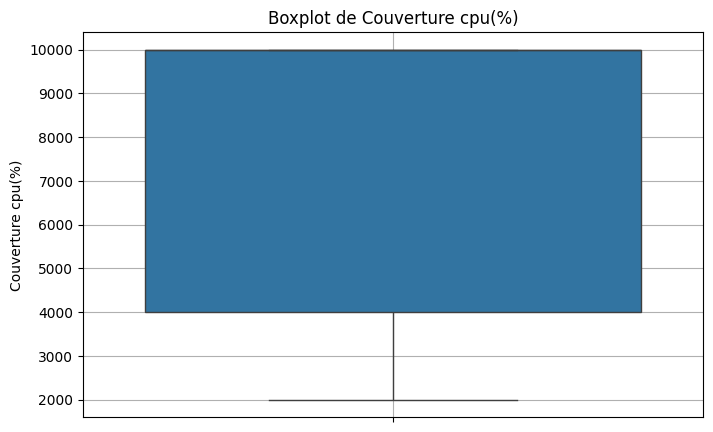

In [58]:
# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

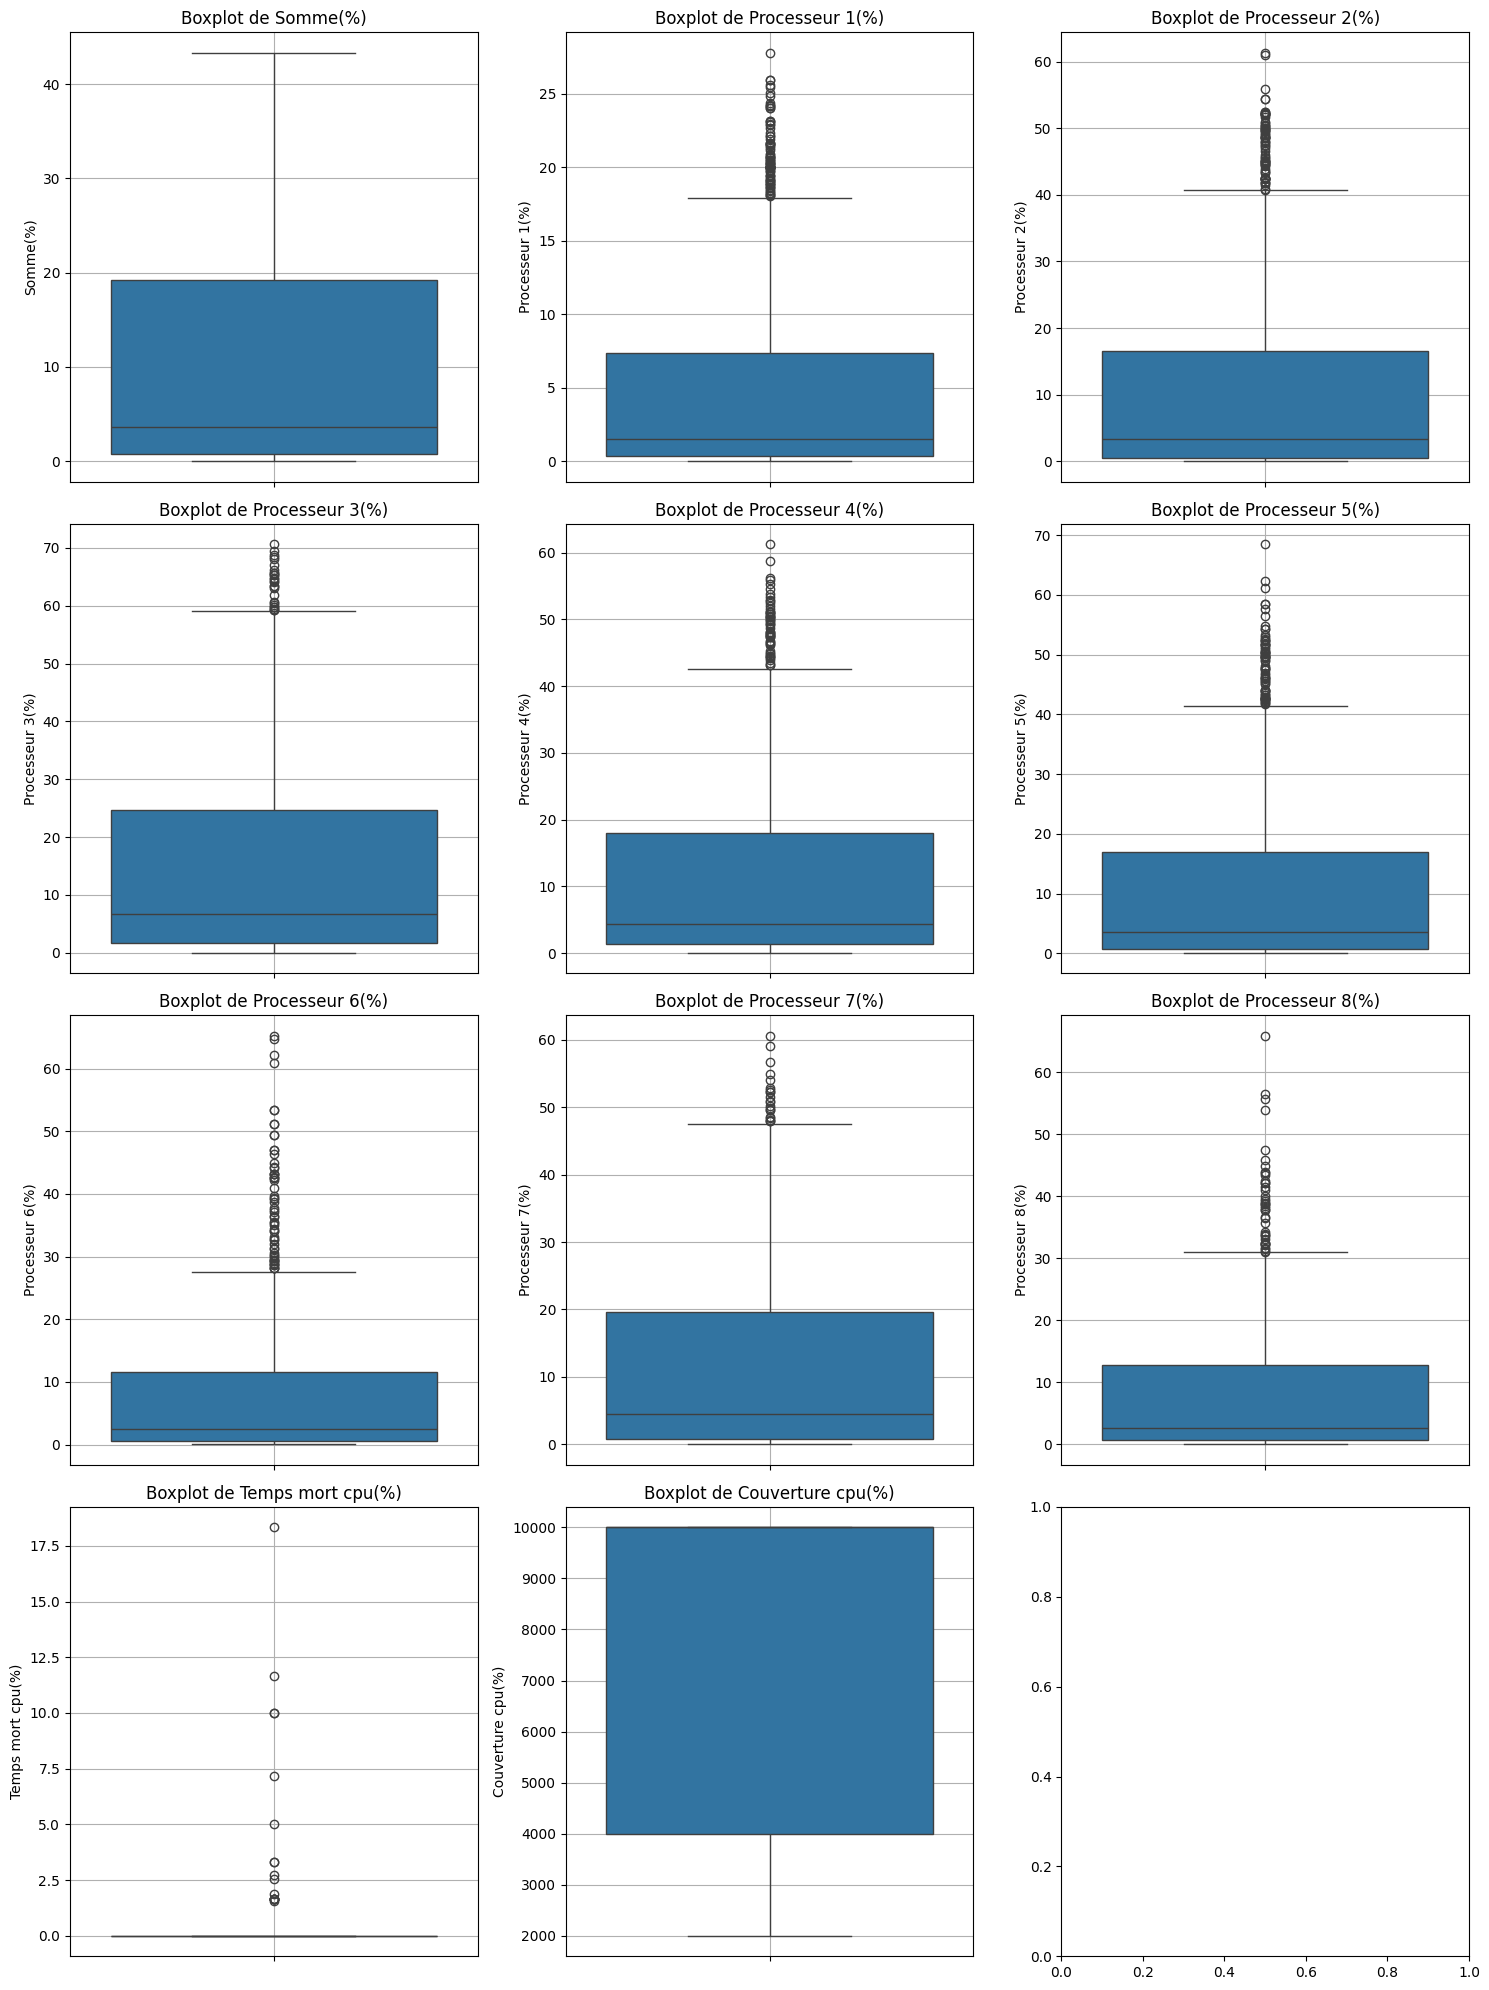

In [59]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

### drop des colonnes inutiles

In [60]:
#on garde tout ici

### Enregistrement du nouveau dataframe dans un nouveau csv

In [61]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_cpu_filtered.csv", index=False, encoding='utf-8')